This post elaborates on the workings of Variational Autoencoders or in its abbreviated form VAE. The concept of VAEs is then shown using the example of image data as well as sound data. Particularly, we are showing how one could use a VAE to create new sound of different genres, or to create new product designs

# Workings of a Variational Autoencoder

# Mathematical Underlyings of a VAE

# Code Implementation of a VAE

# Using a VAE for creating images

# Using a VAE for creating sounds 

## Overview

Next to images we are also applying the Variational Autoencoder to sound data. For that we are taking sound snippets from the music genres techno, rock and piano music. As usually done with sound-analysis, we are taking a larger piece of music and chop it down into small chunks. For that we downloaded three four-hour youtube compilations of each genre and preprocessed them using the <code>pydub</code> Python package. The length of each sound-chunk is set to 1000ms. This generation of chunks generates more than 10.000 sound snippets for each genre.

## Preprocessing

Processing audio data is not as straightforward as for example image data, where we simply normalize the data and are pretty much done. Audio on the other hand is much more complicated. The questions even start with how are we translating sound into a numeric format. In the following we are elaborating in a concise manner how sound-data is processed and what the features are we are feeding in the end into the neural network.

The first problem we encounter when working with sound is that sound is analog in nature, since it is a mechanical wave. That means that sound is a continuous value. Continuous values are very difficult to store on a machine since it is infinitely long. Therefore, we have to digitalize the signal and make it discrete. To transform an Analog signal into a discrete form is a process called Analog to Digital Conversion (ADC). ADC can be done through simply sampling data with a certain rate. In the image below for example we sampled information about the amplitude at all of the small black dots. We usually set a period with which the information about the sound-wave is sampled.

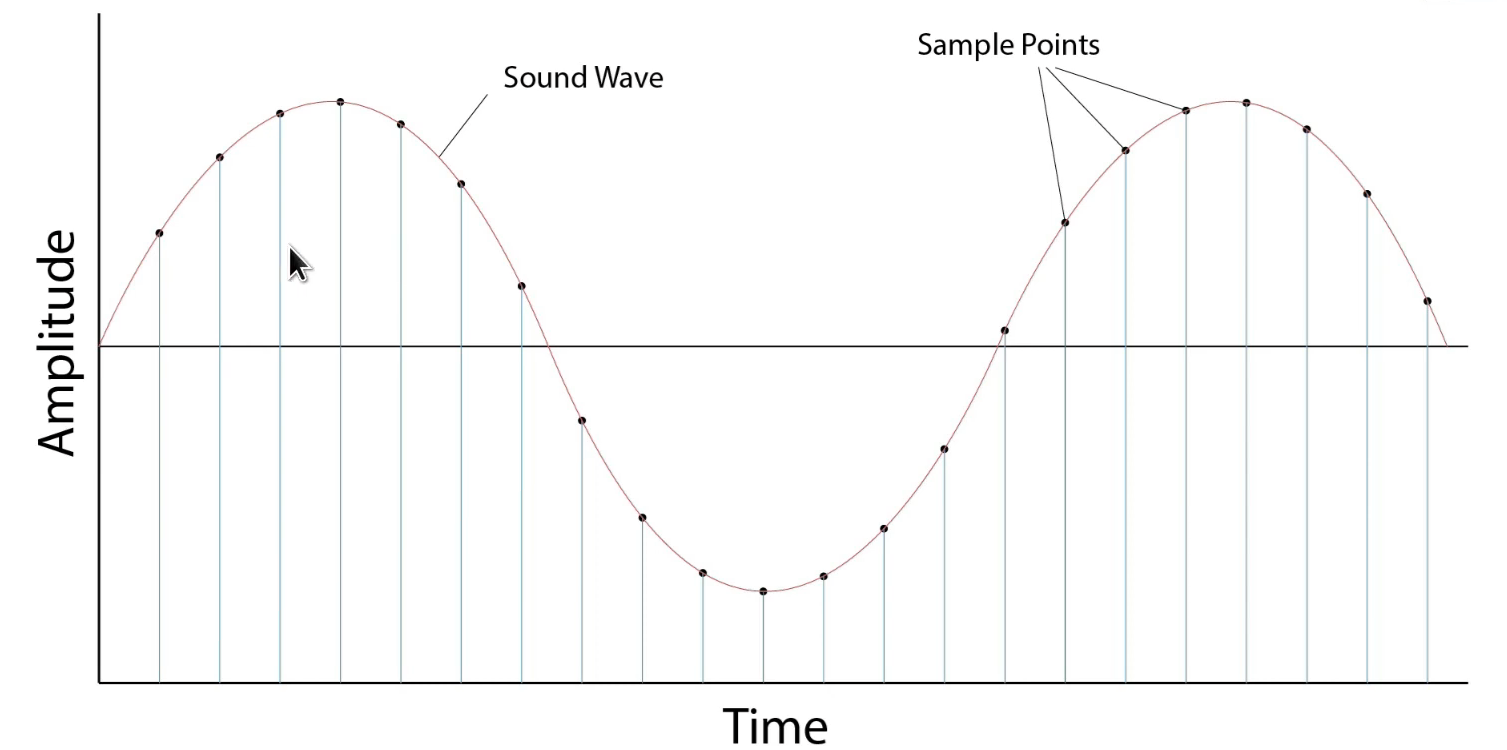

One very important parameter when it comes to sampling is the so-called sampling rate. The sampling rate is the inverse of the period and describes how many samples we collect for each second. The sampling rate is nothing other than a frequency and is measured in hertz. Intuitively, the lower the sampling rate, the higher our sampling error is going to be.

The question is now which sampling rate to use. A CD for example is using a sampling rate of 44.100hz. That value is not arbitrary of course. The reasons why this value of 44.100 is chosen is related to the so-called *Nyquist frequency*. The Nyquist frequency is defined as sampling rate divided by two and describes the rate at which sound can be replicated in a decent quality. Anything above that level would create artifacts. Furthermore, the hearing range of human beings only goes a little bit above a frequency of 20.000. Hence 22.050 (half of 44.100hz) allows humans to capture the entire quality of music.

After sampling the sound we then perform a so-called Fourier Transform. What a Fourier transform does is that it decomposes a complex periodic sound into a summation of sine wave which are oscillating at different frequencies. Meaning that it decomposes a sound into all smaller components it comprises of.

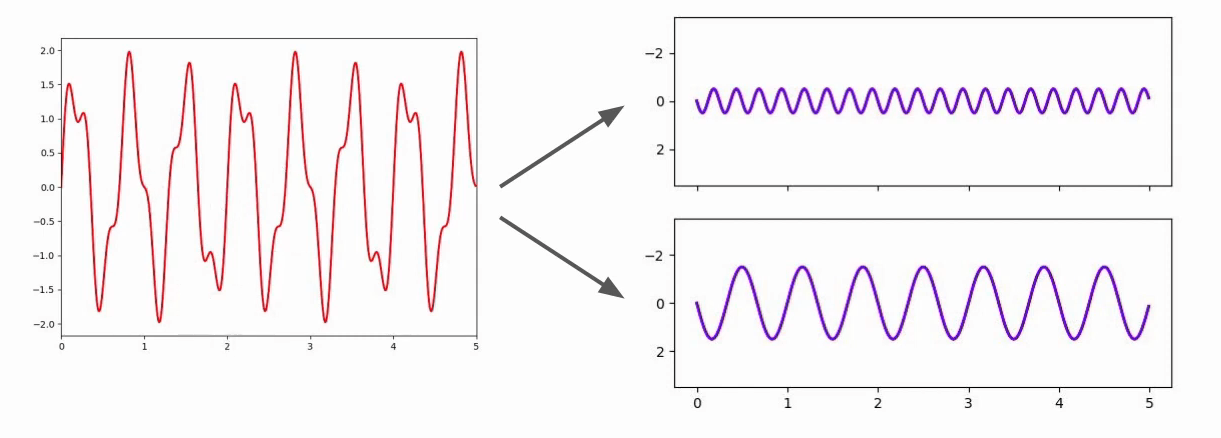

In the image above for example we can decompose the sound-wave on the left side into the two purple sound-waves on the right side. We are paying particular importance on the amplitude of the sound-waves, as they are indicating how much a certain frequency is contributing to the overall sound.

Exactly this decomposition is what you get when applying a Fourier Transform on a sound-wave. Below we show an example what this transformation is doing to a sound snippet from a piano track. On the left side we see the wave form of the sound and on the right side we can see how much each frequency is contributing to the overall sound. The plot on the right is also called a power-spectrum. When applying a Fourier Transform, one also says that we are moving from the time-domain over to the frequency domain. That is because we now do not get any information how the sound is behaving over time, but get only information about the prominence of the different frequencies for the entire sound signal. In other words, we are losing any information how the sound is changing over time. This loss of information is dramatical, as much can be extracted from that information. 

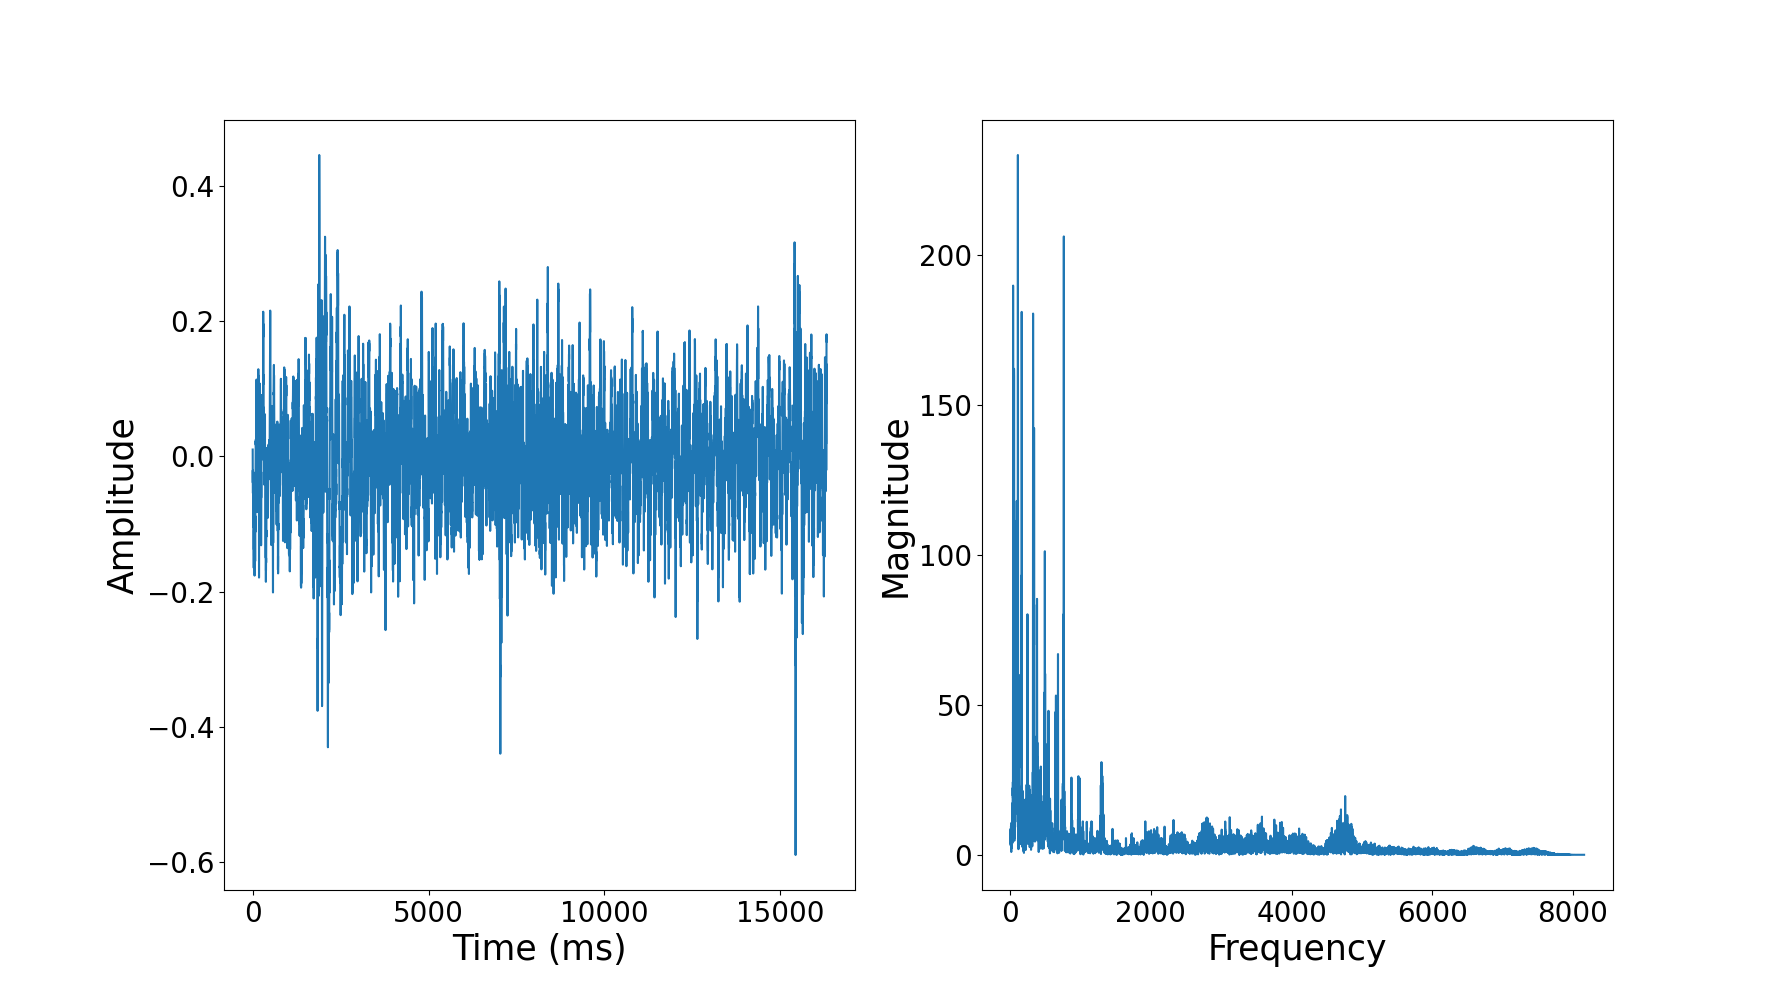

The solution of losing the time component of our data is to apply the short-time Fourier Transform. This algorithm calculates several Fourier Transform at different time intervals. The result of this algorithm gives us therefore information about time, frequency as well magnitude and is called a *spectogram*. It is exactly that spectogram that we are feeding into our neural network, as it describes the sound-signal to a very detailed but compressed level.

Below we find a short sound-snippet from the techno genre and the corresponding spectogram plot. As outlined above, the specotgram plot shows us which frequency is present to which extend at which time of the sound signal. This particular spectogram indicates for example that at the very beginning of the sound we experience much power in the high frequencies.

In [6]:
from IPython.display import Audio
Audio("../reports/figures/sound_vae/example.wav")

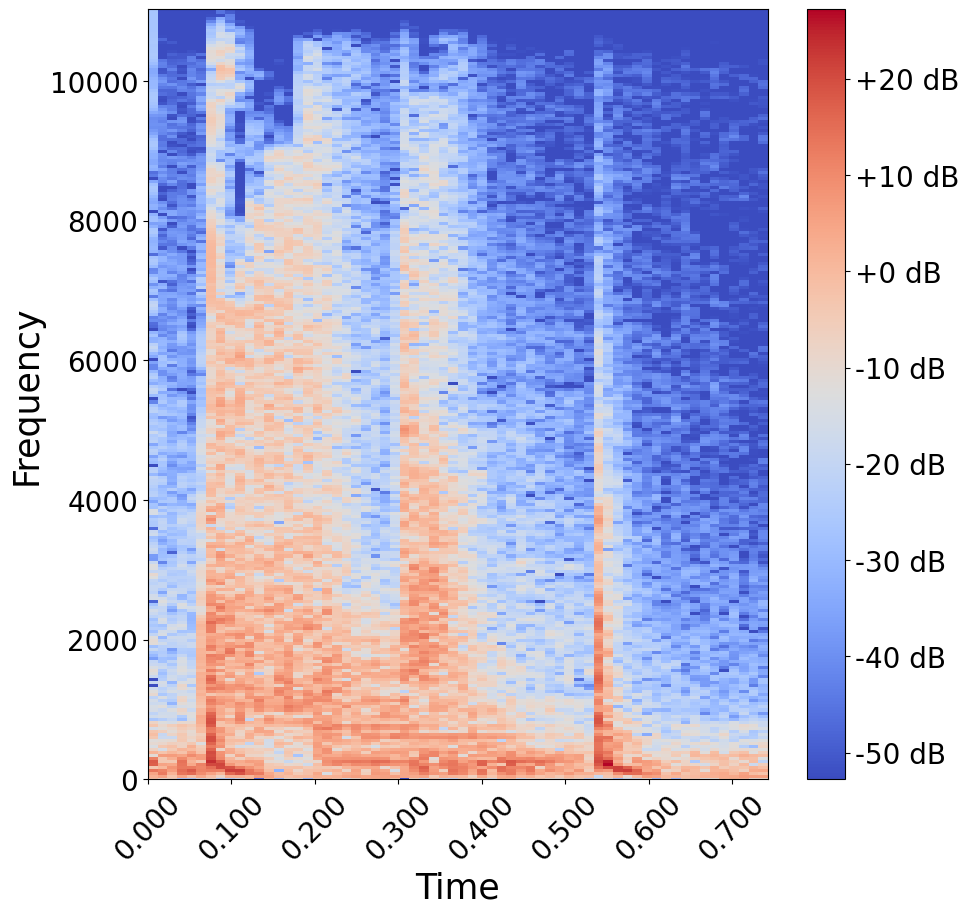

Next to extracting the Short-Time-Fourier-Transform for every sound-signal we also made sure that the sound-snippets had equal length, meaning that their duration was the same for every file. If that was not the case, we right-padded the sound-file with zeros.
Additionally we made sure that there are no missing values within our dataset and also scaled every sound-file in order to be between zero and one.

## Latent representations

Since sound is significantly more complex than images, we decided to bump up the latent space dimension to 128. In order to still visualize how the different music genres are different from one another, we apply a random dimensionality reduction technique (PCA) in order to be able to visualize the latent space in two dimensions. From the graph below we can see that the Rock and Techno genre are overlapping, whereas the Piano genre seems to be different. This result is sensible, since the Piano music is much calmer and slower compared to the other two genres.

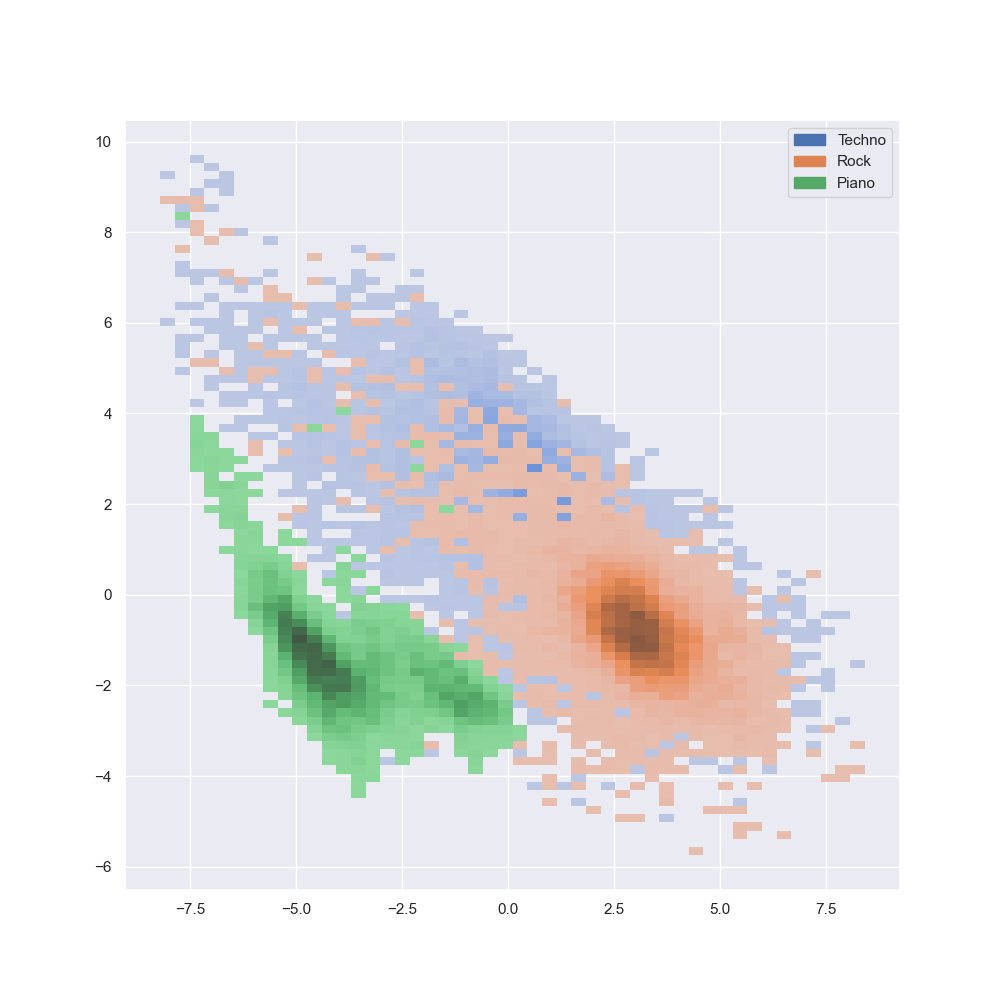

## Results

As for the image VAE we build a page on a web-application with which the user can play around. Herein it is possible to choose from which genre the user would like to hear a created snippet from. Be aware that the quality of the sound snippets is not perfect as the model was not trained until the end, given how computational expensive the procedure is.

The web-application shows nicely the differences of the sound-snippets in their spectograms and also their location within the latent space.

# Github Repository

In [7]:
import seedir as sd
sd.seedir("../src", style="lines", exclude_folders="__pycache__")

ModuleNotFoundError: No module named 'seedir'